#Data Science and Business Analytics Intern

##Name: Aditya Lalchandani

#Task 2 : Prediction using Unsupervised ML

### Predict the optimum number of clusters and represent it visually.

In [1]:
# Importing all libraries required for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
# Loading the data
iris = load_iris()
data = iris.data
iris_df = pd.DataFrame(data, columns=iris.feature_names)

# Display the first 10 rows
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


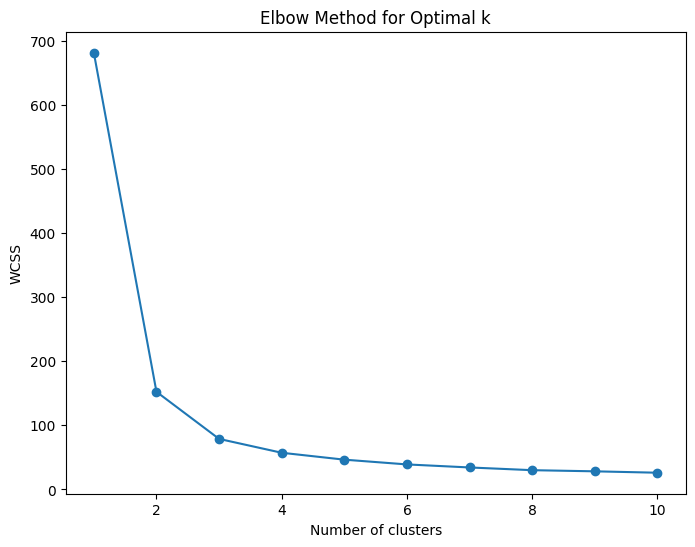

In [3]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [4]:
k_optimal = 4  # Replace with the chosen optimal number of clusters

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data)

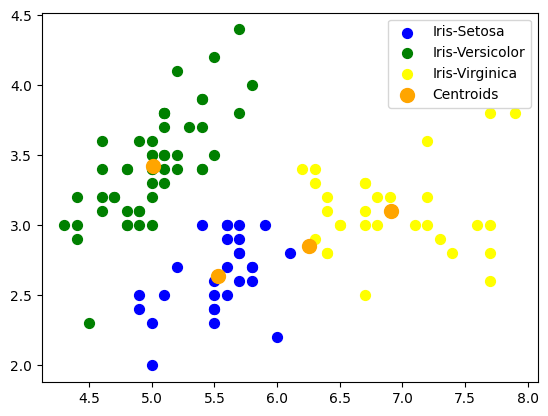

In [5]:
# Let us assume we have two features
feature1 = 0  # Replace with the index of the first feature (0, 1, or 2)
feature2 = 1  # Replace with the index of the second feature (0, 1, or 2)

plt.scatter(data[clusters == 0, feature1], data[clusters == 0, feature2], s = 50, c = 'Blue', label = 'Iris-Setosa')
plt.scatter(data[clusters == 1, feature1], data[clusters == 1, feature2], s = 50, c = 'Green', label = 'Iris-Versicolor')
plt.scatter(data[clusters == 2, feature1], data[clusters == 2, feature2], s = 50, c = 'Yellow', label = 'Iris-Virginica')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, feature1], kmeans.cluster_centers_[:,feature2], s = 100, c = 'Orange', label = 'Centroids')

plt.legend()
plt.show()

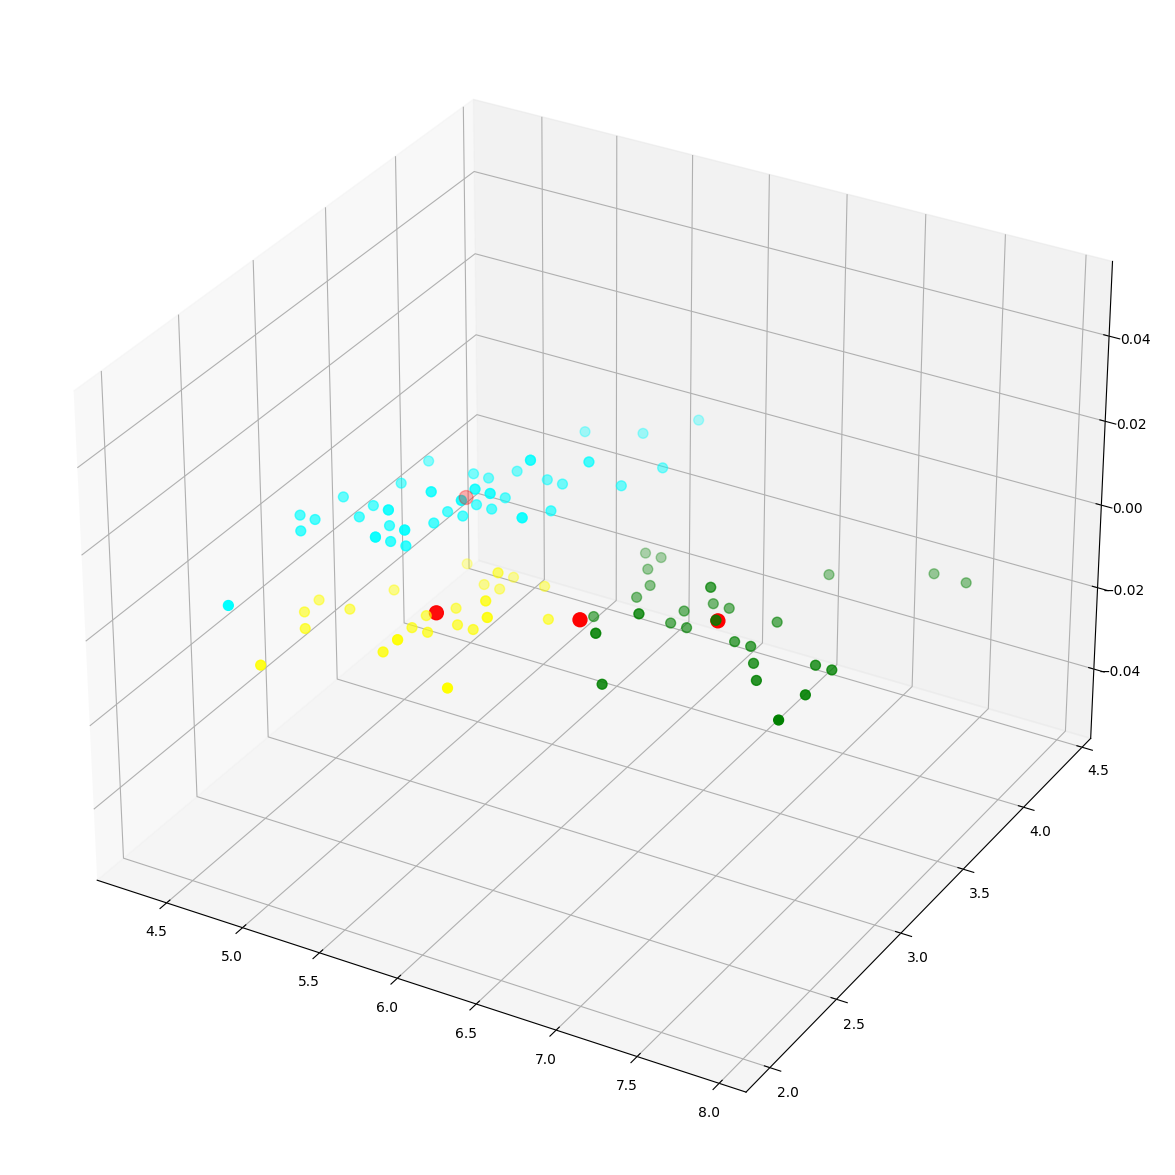

In [6]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(data[clusters == 0, 0],data[clusters == 0, 1], s = 50, c = 'Yellow', label = 'Iris-setosa')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], s = 50, c = 'Cyan', label = 'Iris-versicolour')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], s = 50, c = 'Green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'Red', label = 'Centroids')
plt.show()